## Reading and Understanding the Data

Let us first import essential Libraries and read the Country dataset

In [1]:
# Supress Warnings and Read Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Read The Dataset
country_df = pd.read_csv("Country-Data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check Shape of Dataset
country_df.shape

(167, 10)

In [4]:
# Info of Dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Describe the Dataset
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Checking for Duplicates in Dataset
country_df.duplicated(subset = ['country'], keep = False).sum()

0

In [7]:
# Check for Missing Values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Data Preparation and Visualising
#### Modify exports,health and imports columns

In [8]:
# Now Modify exports,health and imports columns as % to Total GDPP

country_df['exports']=(country_df['exports']*country_df['gdpp'])/100
country_df['health']=(country_df['health']*country_df['gdpp'])/100
country_df['imports']=(country_df['imports']*country_df['gdpp'])/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Visualising Single Variables

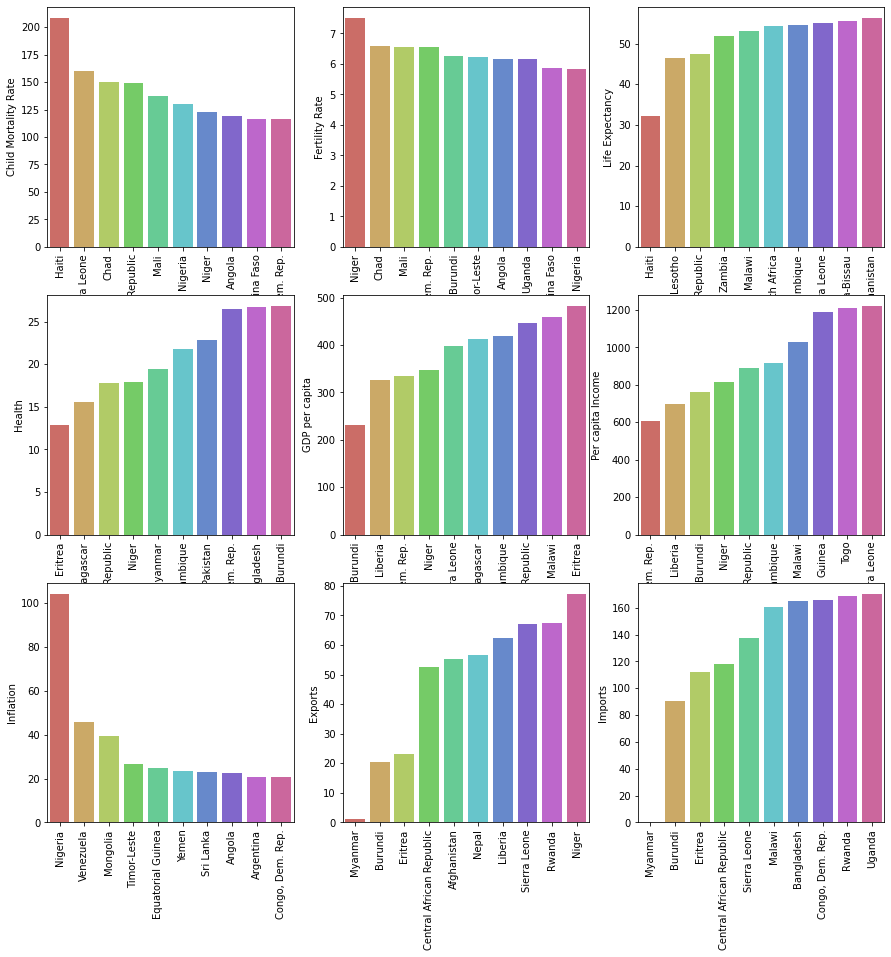

In [9]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0],palette='hls')
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1],palette='hls')
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2],palette='hls')
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0],palette='hls')
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1],palette='hls')
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2],palette='hls')
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0],palette='hls')
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1],palette='hls')
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2],palette='hls')
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.show()

###### From this we can infer that Burundi has lowest gdpp , Congo, Dem. Rep. has lowest income and Haiti has highest Child Mortality

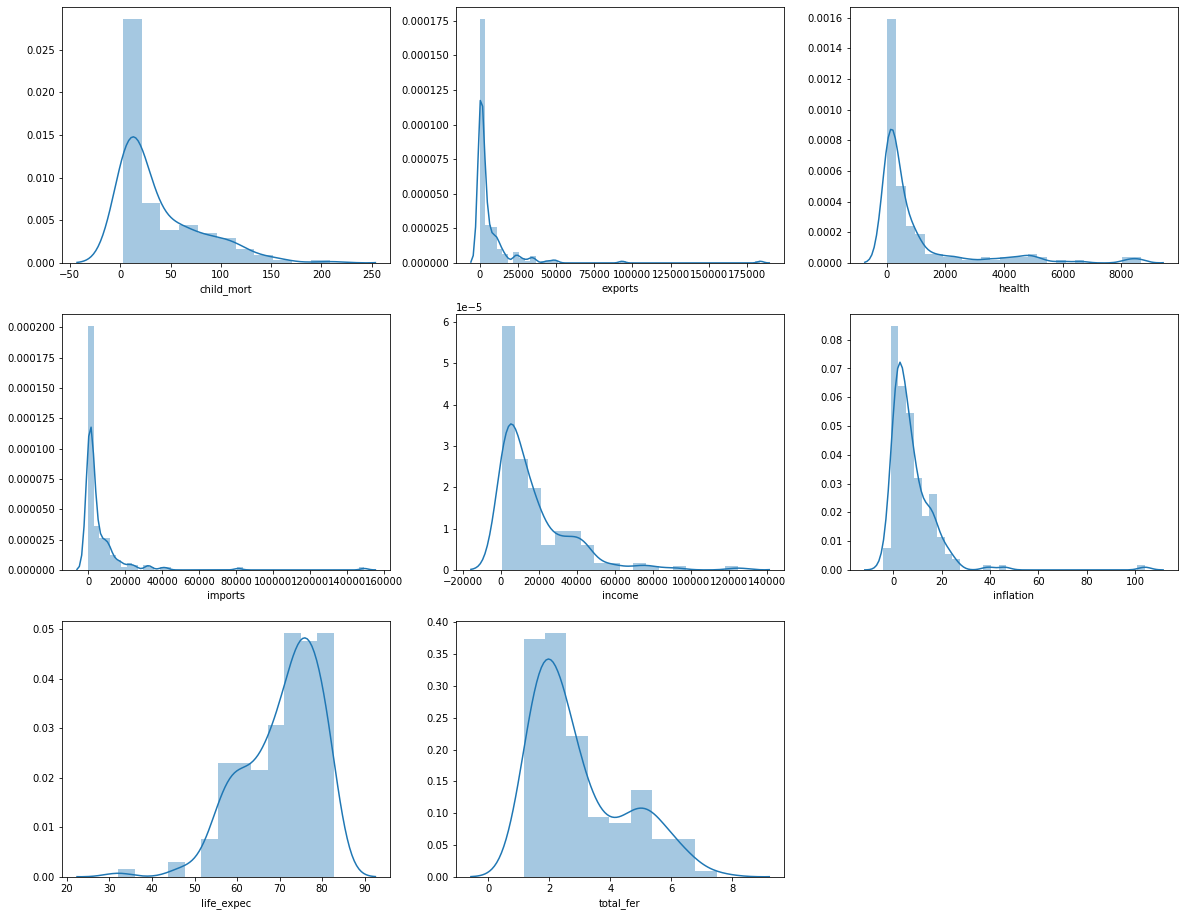

In [10]:
# Plot Distplot
plt.figure(figsize=(20,16))
f = country_df.drop('country',axis =1).columns[:-1]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df.drop('country',axis =1)[i[1]])

#### Visualising Muliple Variables

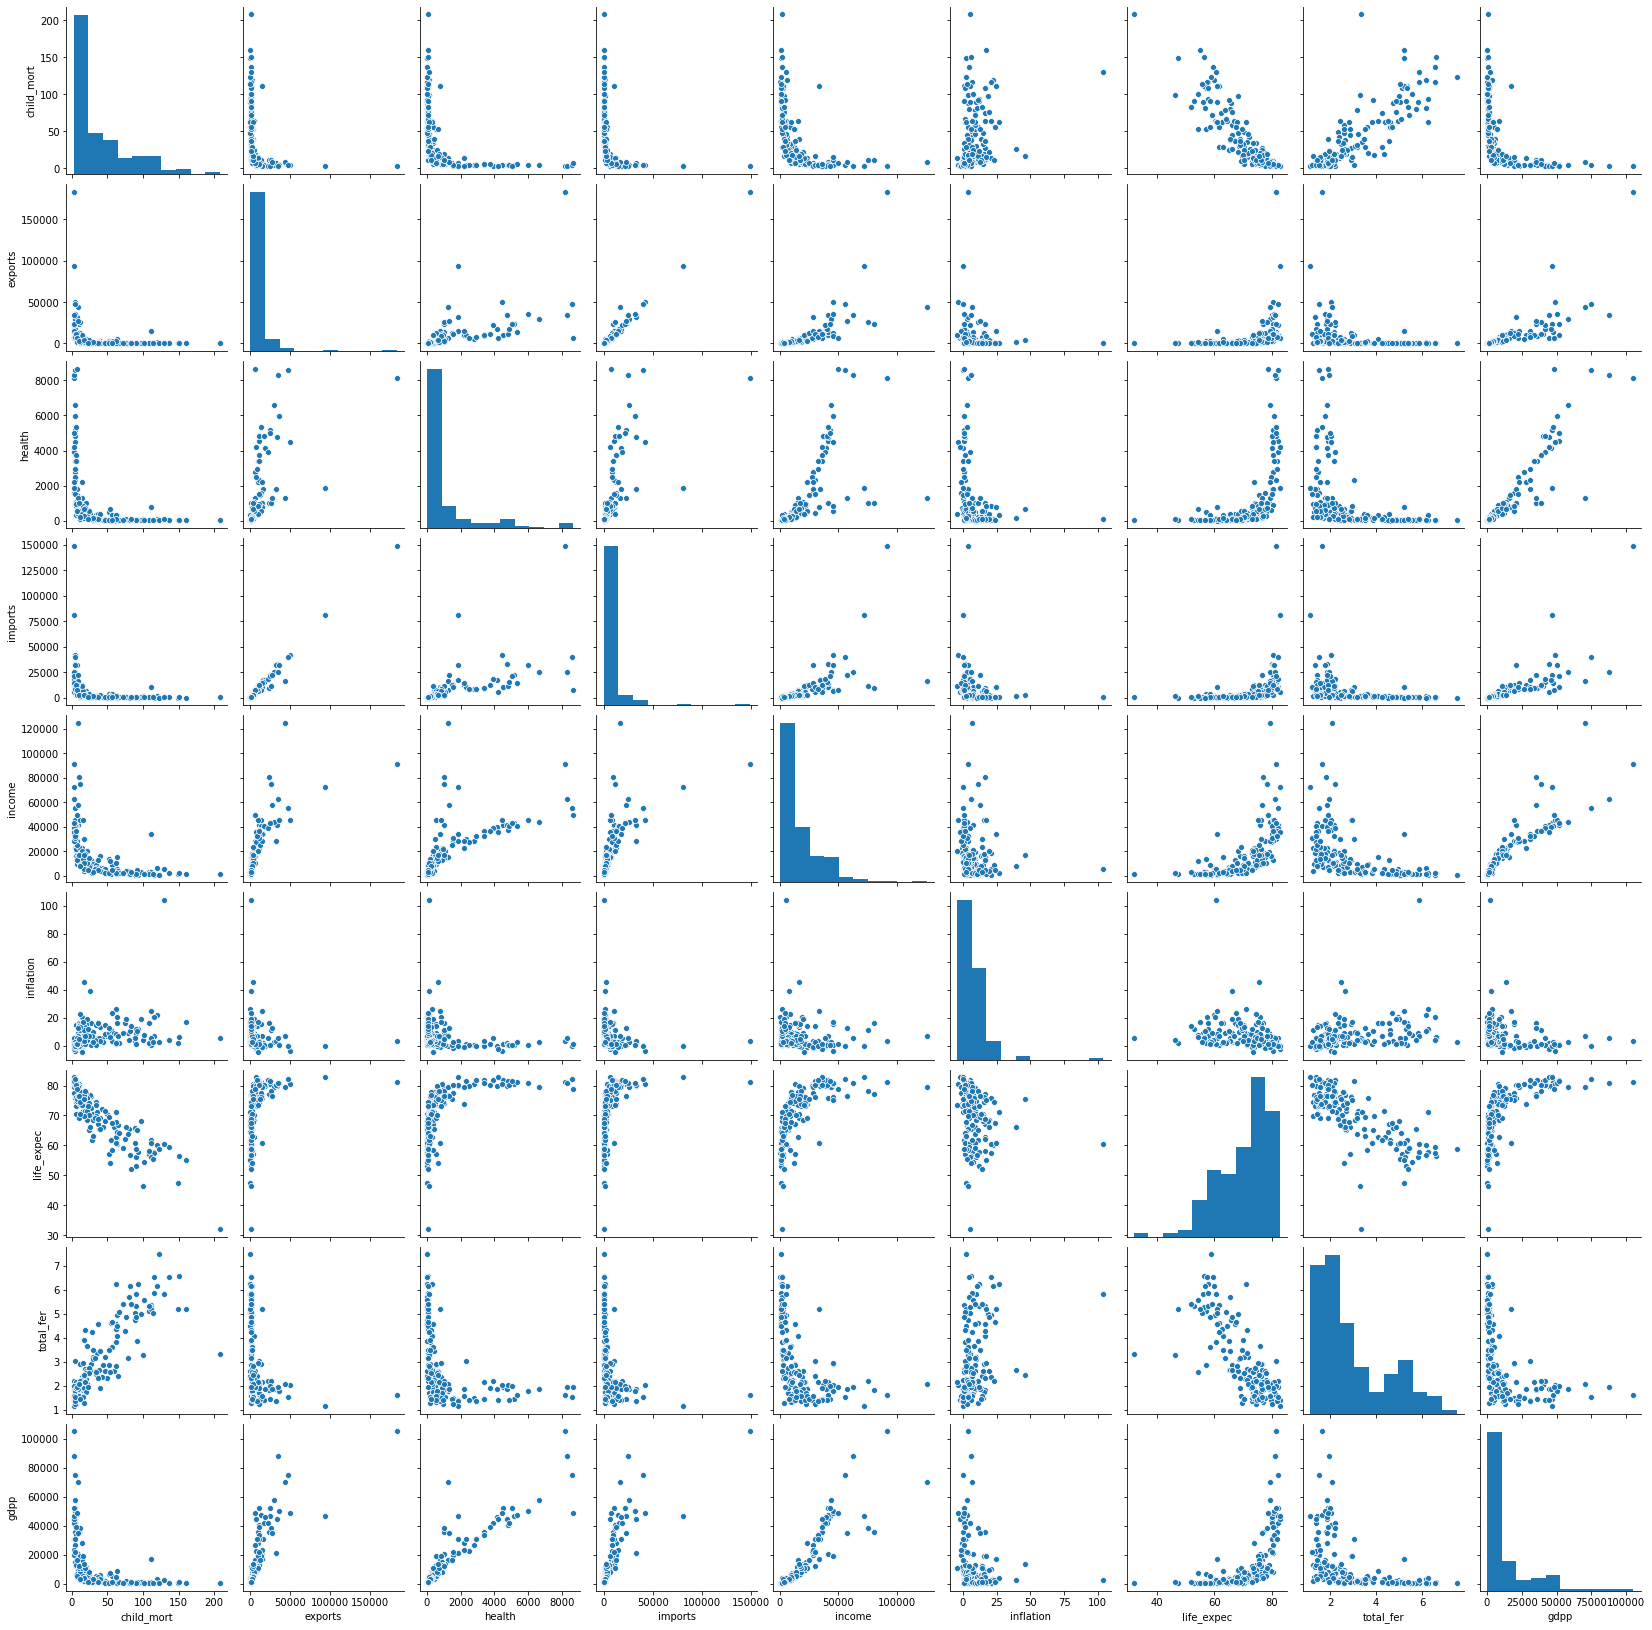

In [11]:
# Bivariate analysis of Column 
sns.pairplot(country_df)
plt.show()

#### Checking Correlation Between Variables

In [12]:
corr = country_df.corr()
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


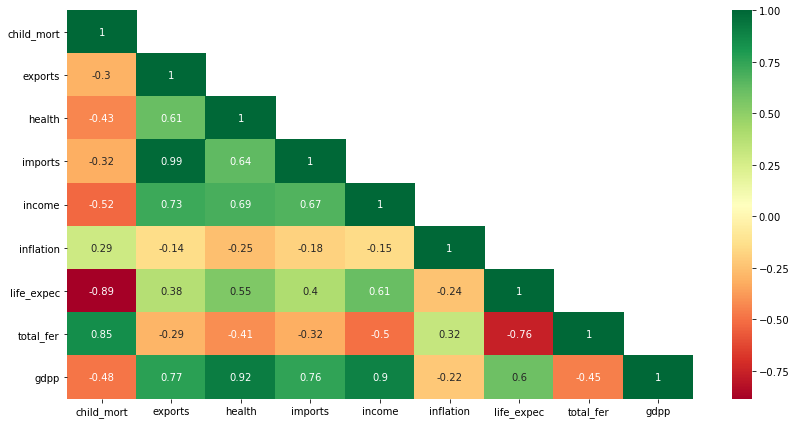

In [13]:
# Let's plot the correlation coefficients to see which variables are highly correlated
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(12,6))
sns.heatmap(corr,mask=mask,annot=True,cmap="RdYlGn");
plt.tight_layout()

###### From this we can infer life_expec is inversely correlated with child_mort and total_fer 

## Outlier Treatment

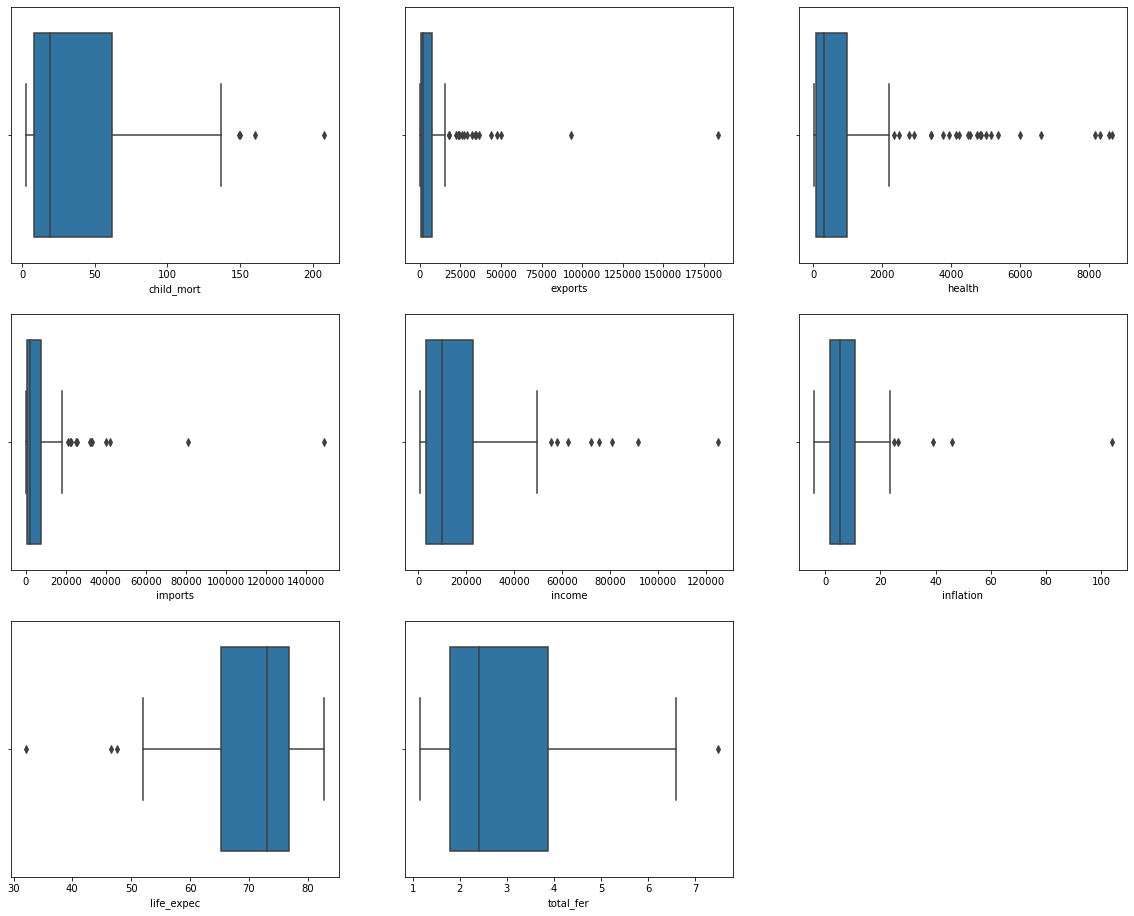

In [14]:
# To plot boxplot for all the columns
plt.figure(figsize=(20,16))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data=country_df)

#### Countries having low child_mort,inflation and total_fer are more developed countries so they don't need immediate Aid  

In [15]:
# We remove countries having less than 1% of child_mort,inflation and total_fer
q1 = country_df['child_mort'].quantile(0.01)
country_df["child_mort"][country_df['child_mort']<=q1] = q1

q2 = country_df['inflation'].quantile(0.01)
country_df["inflation"][country_df['inflation']<=q2] = q2

q3 = country_df['total_fer'].quantile(0.01)
country_df["total_fer"][country_df['total_fer']<=q3] = q3

#### Countries having High exports,health,imports,income,life_expec and gdpp are more developed countries so they don't need immediate Aid  

In [16]:
# Capping countries having More than 95% of exports,health,imports,income,life_expec and total_fer
q1 = country_df['exports'].quantile(0.95)
country_df["exports"][country_df['exports']>=q1] = q1

q2 = country_df['health'].quantile(0.95)
country_df["health"][country_df['health']>=q2] = q2

q3 = country_df['imports'].quantile(0.95)
country_df["imports"][country_df['imports']>=q3] = q3

q4 = country_df['income'].quantile(0.95)
country_df["income"][country_df['income']>=q4] = q4

q5 = country_df['life_expec'].quantile(0.95)
country_df["life_expec"][country_df['life_expec']>=q5] = q5

q6 = country_df['gdpp'].quantile(0.95)
country_df["gdpp"][country_df['gdpp']>=q6] = q6

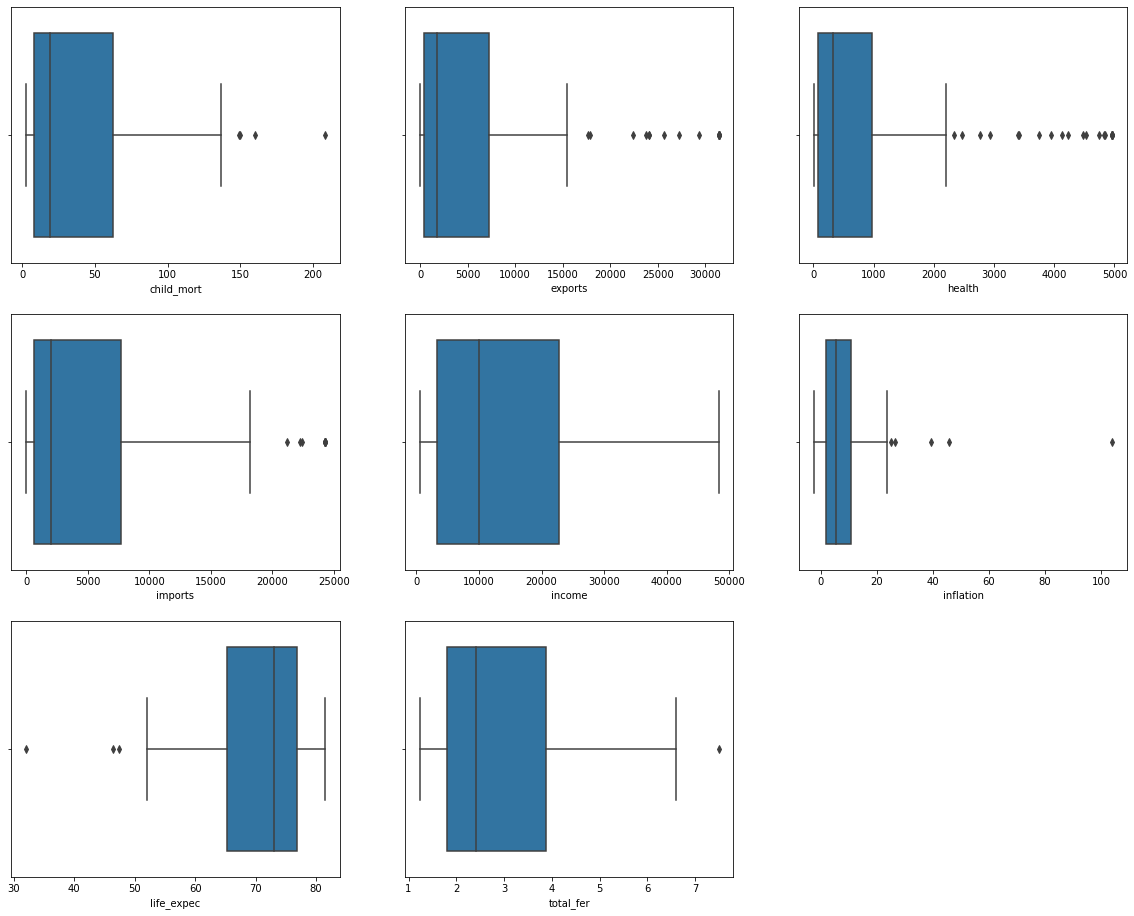

In [17]:
# Plot boxplot again for all the columns after outlier treatment
plt.figure(figsize=(20,16)) 
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data=country_df)

In [18]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,5783.114656,954.012480,5140.089474,15738.760479,7.798194,70.522156,2.948601,11998.826347
std,40.327869,8580.053847,1453.426636,6696.210005,14787.154215,10.553699,8.850052,1.513108,15158.213199
min,2.800000,1.076920,12.821200,0.651092,609.000000,-2.348800,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,30756.570000,4931.330700,23694.552000,47513.000000,20.870000,81.400000,5.861000,48547.000000
99%,153.400000,31385.100000,4966.701000,24241.560000,48290.000000,41.478000,81.400000,6.563600,48610.000000


## Hopkins: Cluster Tendency

In [19]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [21]:
hopkins(country_df.drop('country',axis =1))

0.9204694194306149

#### Since Hopkins score is Greater that 85 , we can proceed .

### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_df.drop('country',axis =1))
df1

array([[ 1.29153663, -0.66958102, -0.62943544, ..., -1.62318027,
         1.90339023, -0.75736169],
       [-0.53899289, -0.54217181, -0.47348864, ...,  0.65482341,
        -0.86081558, -0.52332107],
       [-0.27286971, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.03884551, -0.49883845],
       ...,
       [-0.37235501, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.66195186, -0.70727157],
       [ 0.44839871, -0.63010392, -0.61153387, ..., -0.34251153,
         1.14107928, -0.70727157],
       [ 1.11495022, -0.61289625, -0.59901824, ..., -2.09918104,
         1.62498101, -0.69734618]])

In [23]:
df1 = pd.DataFrame(df1)
df1.columns = country_df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.669581,-0.629435,-0.732729,-0.958349,0.156035,-1.623180,1.903390,-0.757362
1,-0.538993,-0.542172,-0.473489,-0.472182,-0.394006,-0.314406,0.654823,-0.860816,-0.523321
2,-0.272870,-0.475838,-0.530017,-0.560152,-0.192552,0.788991,0.677490,-0.038846,-0.498838
3,2.007831,-0.418960,-0.588935,-0.543087,-0.667360,1.387733,-1.181180,2.128769,-0.560376
4,-0.695682,-0.027134,-0.150685,0.306422,0.227992,-0.604273,0.711490,-0.542634,0.013312


## k-means Clustering
### Find the best value of K

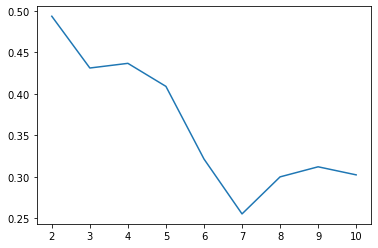

In [24]:
from sklearn.metrics import silhouette_score
# we look at maximum value

ss=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])
plt.show()

The value for cluster number from silhouette curve taken is 3 as,making 4 maynot be fesiable

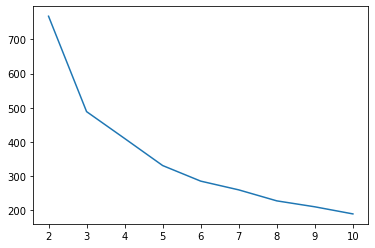

In [25]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append([k,kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])
plt.show()

Value of K from Elbow method is 3

In [26]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))
    
    

For n_clusters=2, the silhouette score is 0.49
For n_clusters=3, the silhouette score is 0.43
For n_clusters=4, the silhouette score is 0.43
For n_clusters=5, the silhouette score is 0.37
For n_clusters=6, the silhouette score is 0.32
For n_clusters=7, the silhouette score is 0.31
For n_clusters=8, the silhouette score is 0.31


Silhouette score highest is of n_clusters==2 but taking n_clusters == 2 mean dividing dataset into two parts which in terms not good for business need, and taking n_clusters == 4 will require higher compution resources.So value taken for n_cluster==3
<br/>Final value of k == 3

In [27]:
kmean = KMeans(n_clusters = 3,random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [28]:
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [29]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [30]:
# Creating cluster_id column and assign labels in it
country_df['cluster_id'] = kmean.labels_

In [31]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [32]:
# Let's check how may data points we have in each cluster
country_df.cluster_id.value_counts()

0    82
1    48
2    37
Name: cluster_id, dtype: int64

#### We get 3 Clusters having significant amount of values in it.

### Plotting the 3 clusters based on these variables:

- GDPP
- Income
- Child_Mort

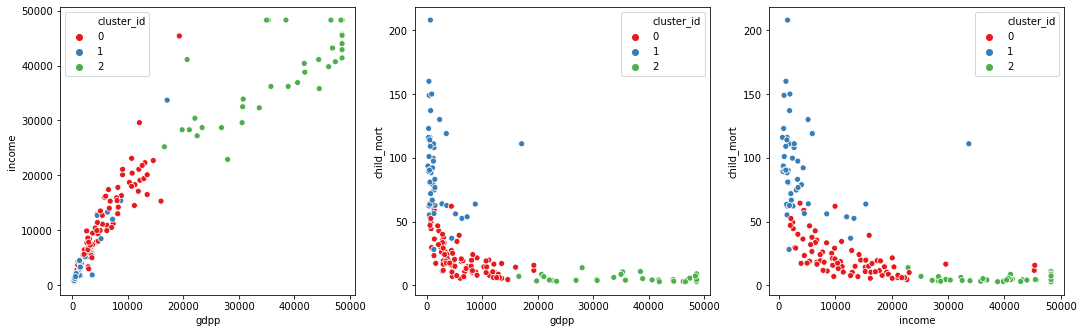

In [33]:
# Plotting scatter plot of these three columns with each other 
plt.figure(figsize=(18,18))

# Scatter plot between gdpp vs income
plt.subplot(3,3,1)
sns.scatterplot(x='gdpp',y='income',hue='cluster_id',data=country_df,palette='Set1')

# Scatter plot between gdpp vs child_mort
plt.subplot(3,3,2)
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',data=country_df,palette='Set1')

# Scatter plot between income vs child_mort
plt.subplot(3,3,3)
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',data=country_df,palette='Set1')
plt.show()

In [34]:
# Group columns based on cluster_id
country_df[['gdpp','income','child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,6287.463415,12304.756098,21.951220
1,1909.208333,3897.354167,91.610417
2,37745.675676,38711.081081,5.243243


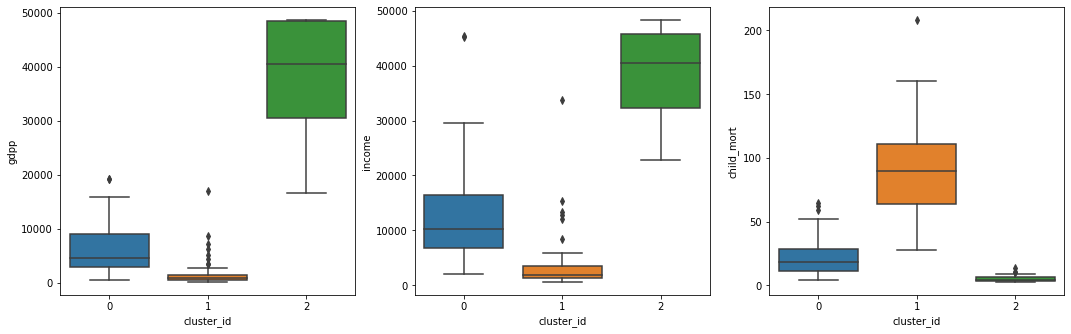

In [35]:
# Plot grouped Clusters based on their id's
plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)

plt.subplot(3,3,2)
sns.boxplot(x='cluster_id', y='income', data=country_df)

plt.subplot(3,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)

plt.show()

##### From this we can infer that :-
- countries of cluster 2 have high gdpp , high income and low child_mort
- countries of cluster 1 have low gdpp , low income and high child_mort 
- countries of cluster 0 are in between as it have decent gdpp , income and child_mort

### Countries of each clusters

In [36]:
c1 = country_df[country_df['cluster_id']==0]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220,0


In [37]:
c1.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880,0


In [38]:
c2 = country_df[country_df['cluster_id']==1]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575,1


In [39]:
c2.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1


In [40]:
c3 = country_df[country_df['cluster_id']==2]
c3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,10276.2,4530.870,10847.10,41400.0,1.160,81.4,1.93,48610,2
8,Austria,4.3,24059.7,4966.701,22418.20,43200.0,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,9800.0,2209.200,12236.00,22900.0,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,14386.5,1028.790,10536.30,41100.0,7.440,76.0,2.16,20700,2
15,Belgium,4.5,31385.1,4750.800,24241.56,41100.0,1.880,80.0,1.86,44400,2


In [41]:
c3.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
134,Slovak Republic,7.0,12665.8,1459.14,12914.80,25200.0,0.485,75.5,1.4300,16600,2
43,Czech Republic,3.4,13068.0,1560.24,12454.20,28300.0,-1.430,77.5,1.5100,19800,2
11,Bahrain,8.6,14386.5,1028.79,10536.30,41100.0,7.440,76.0,2.1600,20700,2
98,Malta,6.8,31385.1,1825.15,24241.56,28300.0,3.830,80.3,1.3600,21100,2
138,South Korea,4.1,10917.4,1531.53,10210.20,30400.0,3.160,80.1,1.2432,22100,2


## Hierarchical Clustering

In [42]:
# Scaled Data
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.669581,-0.629435,-0.732729,-0.958349,0.156035,-1.623180,1.903390,-0.757362
1,-0.538993,-0.542172,-0.473489,-0.472182,-0.394006,-0.314406,0.654823,-0.860816,-0.523321
2,-0.272870,-0.475838,-0.530017,-0.560152,-0.192552,0.788991,0.677490,-0.038846,-0.498838
3,2.007831,-0.418960,-0.588935,-0.543087,-0.667360,1.387733,-1.181180,2.128769,-0.560376
4,-0.695682,-0.027134,-0.150685,0.306422,0.227992,-0.604273,0.711490,-0.542634,0.013312


In [43]:
# Countries Data 
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


### Perform Hierarchical Clustering with Single Linkage

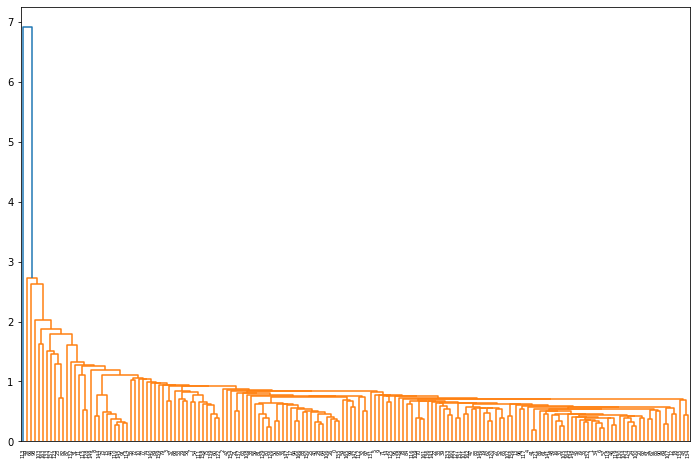

In [44]:
# single linkage
plt.figure(figsize=(12,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Perform Hierarchical Clustering with Complete Linkage

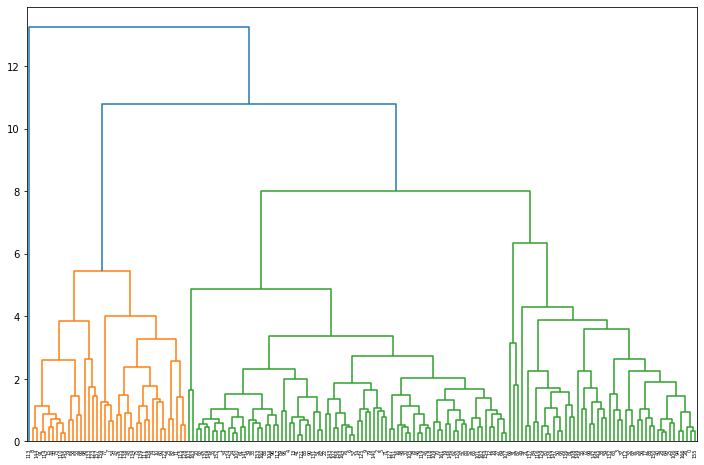

In [45]:
# complete linkage
plt.figure(figsize=(12,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,0


In [48]:
country_df.cluster_labels.value_counts()

0    127
1     39
2      1
Name: cluster_labels, dtype: int64

###### Here we get cluster 2 having only 1 value in it., which is not good. And Taking only 2 Clusters is also not looking feasiable for business needs.So we take 3 clusters after removing this single row

In [49]:
hc = country_df[country_df['cluster_labels']==2]
hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330,1,2


###### Here we get single entry of cluster 2 .So we drop that row , to get better clusters

In [50]:
# Drop 1 Row 
country_df.drop(country_df[country_df['country'] == 'Nigeria'].index, inplace = True) 

##### Again Scaling the country_df after dropping 1 row and store scaled data in df1

In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_df.drop('country',axis =1))
df1

array([[ 1.32226074, -0.67196623, -0.63164597, ..., -0.75987068,
         0.33796396, -0.55415396],
       [-0.53208249, -0.54479778, -0.47601072, ..., -0.52624362,
        -0.90874754, -0.55415396],
       [-0.26249727, -0.47858945, -0.53242583, ..., -0.50180426,
        -0.90874754, -0.55415396],
       ...,
       [-0.36327679, -0.56836694, -0.59880327, ..., -0.70986907,
        -0.90874754, -0.55415396],
       [ 0.46815428, -0.63256373, -0.61378017, ..., -0.70986907,
         0.33796396, -0.55415396],
       [ 1.14337708, -0.61538858, -0.60128955, ..., -0.69996122,
         0.33796396, -0.55415396]])

In [52]:
df1 = pd.DataFrame(df1)
df1.columns = country_df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,1.322261,-0.671966,-0.631646,-0.735907,-0.961284,0.298730,-1.631487,1.930677,-0.759871,0.337964,-0.554154
1,-0.532082,-0.544798,-0.476011,-0.475747,-0.397757,-0.366957,0.648563,-0.856250,-0.526244,-0.908748,-0.554154
2,-0.262497,-0.478589,-0.532426,-0.563586,-0.196594,1.194382,0.671250,-0.027524,-0.501804,-0.908748,-0.554154
3,2.047873,-0.421819,-0.591227,-0.546546,-0.670715,2.041620,-1.189090,2.157908,-0.563233,0.337964,-0.554154
4,-0.690810,-0.030733,-0.153852,0.301701,0.223342,-0.777128,0.705281,-0.535453,0.009441,-0.908748,-0.554154


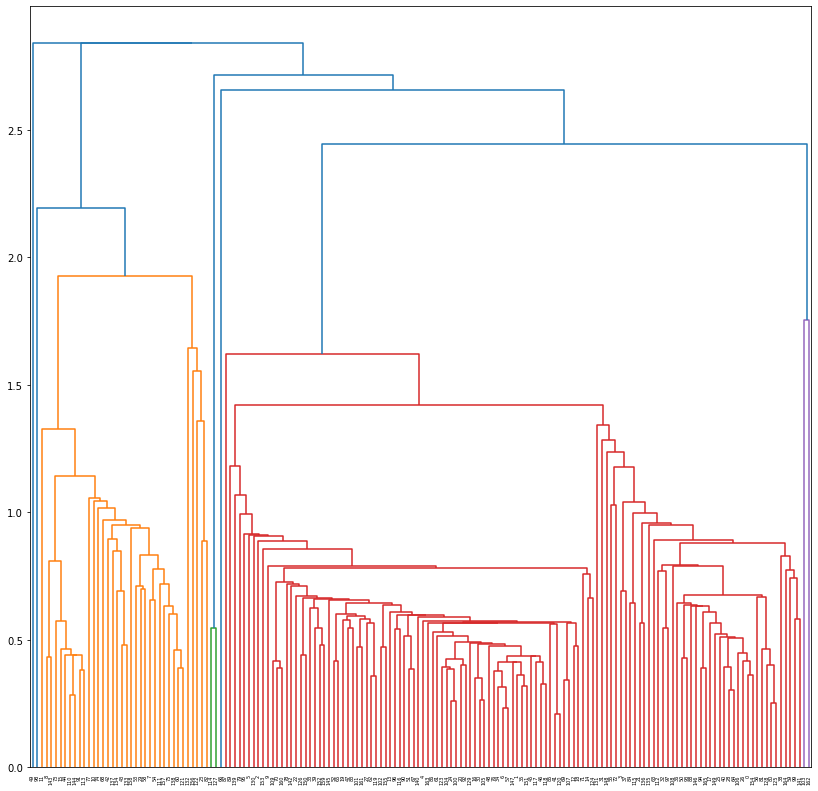

In [53]:
# single linkage
plt.figure(figsize=(14,14))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

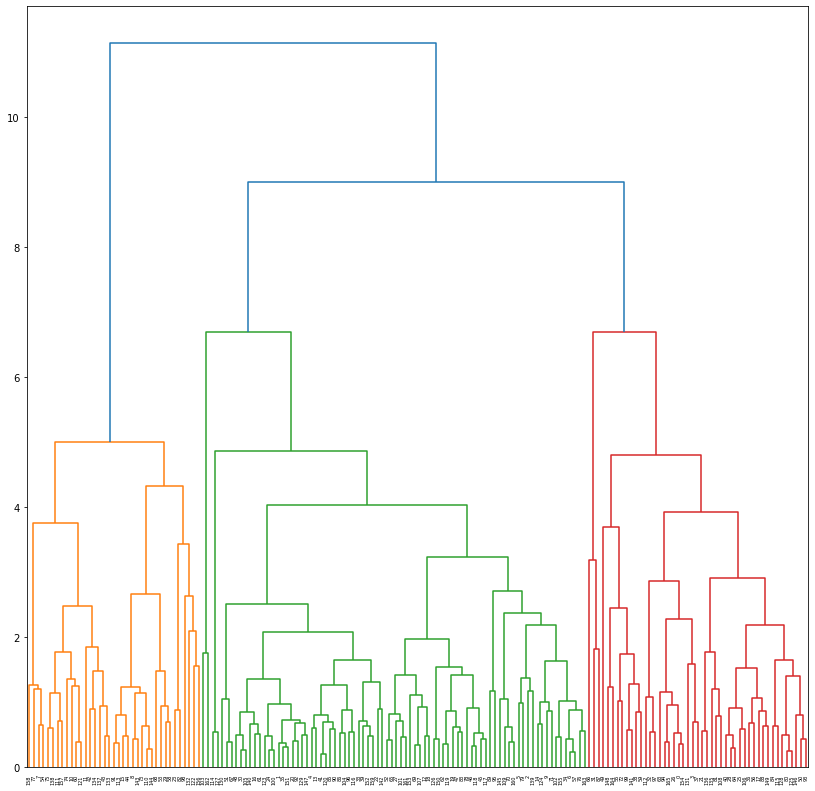

In [54]:
# complete linkage
plt.figure(figsize=(14,14))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [56]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,1


In [57]:
country_df.cluster_labels.value_counts()

1    82
0    47
2    37
Name: cluster_labels, dtype: int64

#### Now we get 3 clusters having considerable count of variables

### Plot Clusters in Boxplots

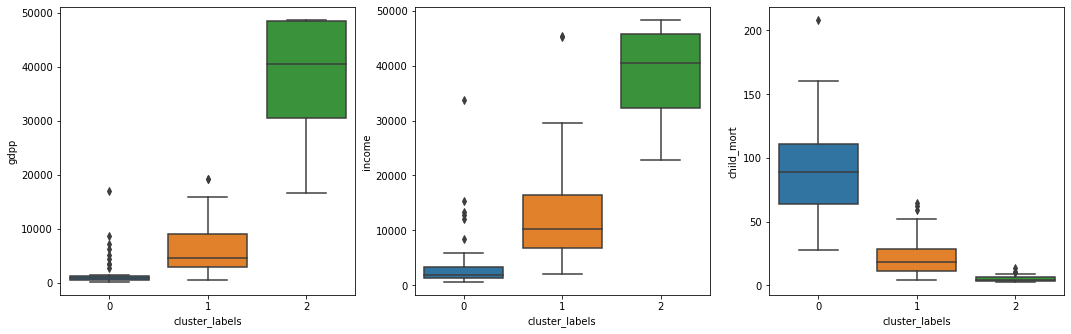

In [58]:
# Boxplots

plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df)

plt.subplot(3,3,2)
sns.boxplot(x='cluster_labels', y='income', data=country_df)

plt.subplot(3,3,3)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df)

plt.show()

##### From this we can infer that :-
- Countries of cluster 2 have high gdpp , income and low child_mort
- Countries of cluster 0 have low gdpp , income and high child_mort 
- Countries of cluster 1 are in between as it have decent gdpp , income and child_mort

### Countries of each clusters

In [59]:
hc1 = country_df[country_df['cluster_labels']==0]
hc1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,1,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575,1,0


In [60]:
hc1.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1,0


In [61]:
hc2 = country_df[country_df['cluster_labels']==1]
hc2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460,0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200,0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300,0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220,0,1


In [62]:
hc2.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592,0,1
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738,0,1
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758,0,1
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786,0,1
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880,0,1


In [63]:
hc3 = country_df[country_df['cluster_labels']==2]
hc3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
7,Australia,4.8,10276.2,4530.870,10847.10,41400.0,1.160,81.4,1.93,48610,2,2
8,Austria,4.3,24059.7,4966.701,22418.20,43200.0,0.873,80.5,1.44,46900,2,2
10,Bahamas,13.8,9800.0,2209.200,12236.00,22900.0,-0.393,73.8,1.86,28000,2,2
11,Bahrain,8.6,14386.5,1028.790,10536.30,41100.0,7.440,76.0,2.16,20700,2,2
15,Belgium,4.5,31385.1,4750.800,24241.56,41100.0,1.880,80.0,1.86,44400,2,2


In [64]:
hc3.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
134,Slovak Republic,7.0,12665.8,1459.14,12914.80,25200.0,0.485,75.5,1.4300,16600,2,2
43,Czech Republic,3.4,13068.0,1560.24,12454.20,28300.0,-1.430,77.5,1.5100,19800,2,2
11,Bahrain,8.6,14386.5,1028.79,10536.30,41100.0,7.440,76.0,2.1600,20700,2,2
98,Malta,6.8,31385.1,1825.15,24241.56,28300.0,3.830,80.3,1.3600,21100,2,2
138,South Korea,4.1,10917.4,1531.53,10210.20,30400.0,3.160,80.1,1.2432,22100,2,2


#### Now Selecting Countries we get from k-means Clustering and Hierarchical Clustering  
Countries which are dier need for Aid ar those which have : 
   - low gdpp 
   - low income 
   - high child_mortality

In [65]:
c2.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,1


In [66]:
hc1.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,1,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,1,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,1,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,1,0


Country 'Nigeria' has high income and gdpp that most countries which means it is not in immediate need of Aid.

## Conclusion 
The countries have low gdpp , low income and high child mortality are the countries which are in direst need of Aid. <br/> 
Top 10 Countries are : 
<ol>
    <li> Burundi </li>
<li> Liberia	</li>
<li> Congo, Dem. Rep.</li>
<li> Niger</li>
<li> Sierra Leone</li>
<li> Madagascar</li>
<li> Mozambique</li>
<li> Central African Republic</li>
<li> Malawi</li>
<li> Eritrea	</li>
</ol>